<h1> Encoding of Data on a Quantum Computer</h1>

When it comes about quantum machine learning, encoding of data is the first step and it plays one of the most important role in the overall algorithm. Proper representation of data can make the work for other part of the algorithm easier if done properly  otherwise, as well difficult if a wrong techinique for representation is chosen. You will get to know how as we proceeds with the topic in detail.

In the present NISQ era most of the algorithms works with classical data on quantum frameworks. While looking at the traditional quantum computing, one may a often find the the word state prepration. State prepration is the process of putting quantum computers in initial state that envodes the input to the algorithm. In quantum machine learning algorithm, how we encode data has a major impact over the whole algorithm. 

    ###Write more things in introduction about runtime, featuremap impact

In order to solve supervised machine learning tasks based on classical datasets, the quantum algorithm requires an information encoding and read out step that can be highly non-trivial procedures, and it is important to consider them in runtime estimates.

<img src="1.png" width="500" height="300">

This image represents the various encoding strategies:

<img src="2.png" width="600" height="300">

Now, we will look into different types of encooding techniques in detail.

<b> 1. Encoding Binary Inputs into Basis States </b>
    
Data encoding in basis state is the most straightforward technique of data encoding. In this technique the computational basis state of a n-qubit system is associated with a classical n-bit string i.e. the state of each qubit is associated with a bit in the binary representation of the input feature.

<b>Example:</b> 

Suppose you have an inital state of binary string 10110 and you want to encode it for quantum operations. Using basis state encoding technique the corresponding quantum state is: 
$$\ket{10110}$$

This can be encoded into the quantum circuit using NOT gates. The qubits in qiskit by default initiates with state $\ket{0}$ and applying a NOT gate converts the state to $\ket{1}$.

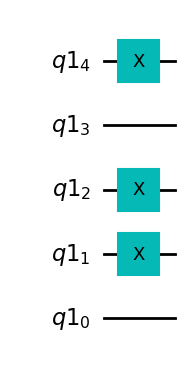

In [2]:
# we import all necessary methods and objects
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# we use 5 qubits 
q = QuantumRegister(5)

qc = QuantumCircuit(q)

qc.x(q[1])
qc.x(q[2])
qc.x(q[4])


# draw the circuit
display(qc.draw(output='mpl',reverse_bits=True))

The binary data is now encoded into the quantum circuit, for confirmation let's take the measurement of the states:

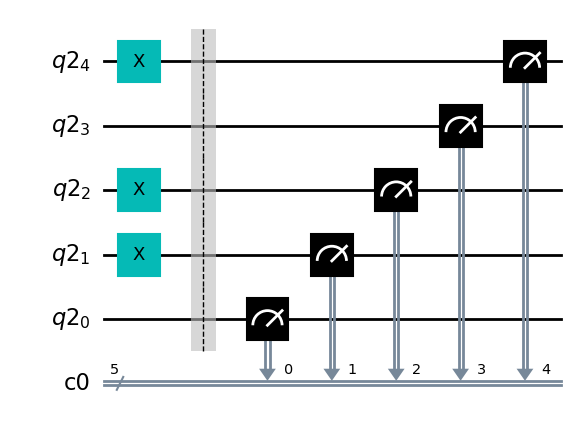

{'10110': 1024}


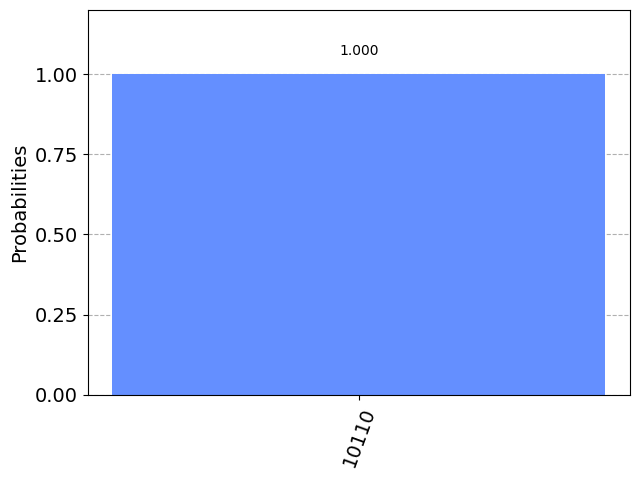

In [3]:
# we import all necessary methods and objects
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from random import randrange

# we use 5 qubits 
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc1 = QuantumCircuit(q,c)

qc1.x(q[1])
qc1.x(q[2])
qc1.x(q[4])

# define a barrier
qc1.barrier()

# measurement 
qc1.measure(q,c)  

# draw the circuit
display(qc1.draw(output='mpl',reverse_bits=True))

# execute the circuit and read the results
job = execute(qc1,Aer.get_backend('qasm_simulator'),shots=1024)

counts = job.result().get_counts(qc1)
        
print(counts)

#probability of state
plot_histogram(counts)

<b> 1.1 Encoding of single input <b>

Basic principle of basis state encoding is just introduced in the previous section. As aformentioned, state of each qubit is associated with a bit in binary string. This is not only constrained to integers converted to binary strings but rather can be generalized for decimals as well. Suppose we have a scalar value $x$ that can be represented as a $n$-bit binary sequence.

$$b=b_sb_{n_{l-1}}...b_1b_0\cdot b_{-1}b_{-2}.....b_{-n_r}$$

Where, $n=(1+n_l+n_r)$, b_s is used for the representation of sign, $n_l$,$n_r$ represnts the left and right of the decimal dot respectively. 
?
Original number $x$ can be retrived using 

$$x=(-1)^{b_s}(b_{n_{l-1}}2^{n_{l-1}}+...+b_02^0+b_{-1}2^{-1}+b_{-2}2^{-2}+...+b_{-n_r}2^{-n_r})$$

The algorithm for the state prepration is very much straightforward, we only have to flip the qubits representing non-zero bits:

$$U(b)=\prod_{i=1}^{nN}X^{b_i}$$

Corresponding circuit diagram is:

<img src="3.png" width="200" height="100">

<b>Example</b>

Suppose an input vector $x=(-2.625,0.150)$. Using fixed-point binary representation with a precisition of $n_l=2$,$n_r=3$ $x$ can be written as:

$$x=(110.101,000.001)$$

Corresponding binary sequence of length $nN$ where $N$ is the number of featurees in input and $n$ is the number of bits each feature requires is $110101000001$ and the corresponding quantum state will be:

$$\ket{x}=\ket{110101000001}$$

We the correcpodning circuit can be drawn as follows:

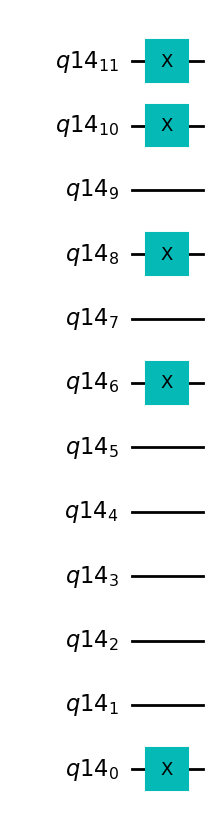

In [4]:
# we import all necessary methods and objects
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

vecx=[1,1,0,1,0,1,0,0,0,0,0,1]
N=len(vecx)
q = QuantumRegister(N)

qc2 = QuantumCircuit(q)


for i in range(N):
    if vecx[i]==1:
        qc2.x(q[N-i-1])

# draw the circuit
display(qc2.draw(output='mpl',reverse_bits=True))

It is evident that the basis encoding is qubit-efficient, as we require at most $n$ gates. But a drawback of this representation is that it requires a lage number of qubits if we want to represent data with high precisition.

<b> 1.2 Encoding of data in superposition  <b>

Let's assume we have a binary dataset $\mathscr{D}$ where each state $x^m\in \mathscr{D}$ is represented by a binary string of the form

$$b^m=(b_1^m,...,b_n^m)$$

Where, $b_i^m\in {0,1}$ for $i=1,...,n$

A superposition of basis states $|{x^m}\rangle$ of the form

$$\mathscr{D}=\frac{1}{\sqrt{M}}\sum_{m=1}^{M}|{x^m}\rangle$$


<b>Example</b>

Let's say, we have $\mathscr{D}$={$(01,01),(11,10)$}.

Therefore, the binary inputs are $x^1=(01,01)$ and $x^2=(11,10)$.

Corresponding quantum basis states are: $|x^1\rangle=|0101\rangle$ and $|x^2\rangle=|1110\rangle$

The full data superposition will result in:

$$|\mathscr{D}\rangle=\frac{1}{\sqrt{2}}(|0101\rangle+|1110\rangle)$$

In the computational basis the basis states are:

$$|0101\rangle= |01\rangle \otimes |01\rangle=(0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0)^T$$

 # 4.  Encoding data via Hamiltonian

This method of encoding a dataset associates the hamiltonian H of a Quantum Circuit $$\large |{\psi'}\rangle =  e^{-iH_xt} |{\Psi}\rangle \qquad \qquad ...(1)$$ which can be depicted as <img src="11.png" width="250" height="300"> where X is $M\times N$ data matrix in which rows represents feature vectors.


$ \large Associating\ Hamiltoninan\ H\ with\ an\ matrix\ A\ (H_A) $

$$ 
H_A =
\begin{pmatrix}
0 & A \\
A^\dagger & 0
\end{pmatrix}
$$

<b>Example:</b> 
$$ 
A =
\begin{pmatrix}
0.032 & -0.047 \\
0.082 & 0.00
\end{pmatrix}
$$

$$ 
H_A =
\begin{pmatrix}
0 & 0 & 0.032 & -0.047 \\
0 & 0 & 0.082 & 0.000 \\
0.032 & 0.082 & 0 & 0 \\
-0.047 & 0.000 & 0 & 0
\end{pmatrix}
$$


The process of implementing a Hamiltonian evolution on a quantum computer is called Hamiltonian simulation.The problem of Hamiltonian simulation can be formulated as follows: Given a Hamiltonian H, a quantum state $|{\psi}\rangle$, an error $\epsilon>0$, the evolution time t (which can be imagined as a scaling factor to H), and an appropriate norm that measures the distance between quantum states, find an algorithm which implements the evolution of Eq.(1) so that the final state of the algorithm,$|{\tilde \psi}\rangle$, is $\epsilon$ close to the desired final state $|{\psi}\rangle$
$$ \large \Vert |{\psi'}\rangle- |{\tilde \psi}\rangle \Vert \leq \epsilon $$

<b> 4.1 Hamiltonian Simulation 

Considering a Hamiltonina H that can be decomposed into several Hamiltonians i.e $\mathrm{H} = \sum_{j=1}^{J} H_j $ so that we can easily simulate each $H_j$ and Here, $$ \large e^{-i \sum_{j} H_j t} \neq \prod_{j} e^{-iH_jt} $$ as for non commuting Hamiltonians, We can't apply this rule. For that, We have $$ \large e^{-i \sum_{j} H_j t} \neq \prod_{j} e^{-iH_jt} + \mathrm{O}(t^2) $$ which is known as Suzuki-Trotter formula.

Every Hamiltonian can be written as (in terms of Pauli's operators) $$ \large \mathrm{H} = \sum_{j_1,\cdots,j_n \in \{1,x,y,z\}} h_{j_1,\cdots,j_n}(\sigma^1_{j_1} \otimes \cdots\otimes \sigma^n_{j_n})$$ We sum over all the possible tensor product of pauli's operators applied to n qubits and the coefficients can be written as  $$ \large  h_{j_1,\cdots,j_n} = \frac{1}{2^n}tr\{(\sigma^1_{j_1} \otimes \cdots\otimes \sigma^n_{j_n})H\}$$

<b>Example:</b> 
For two qubits, We can write $$ \large H_2 = h_{1,1}(\sigma^1_1\otimes\sigma^2_1)+h_{1,x}(\sigma^1_1\otimes\sigma^2_x)+\cdots+h_{z,z}(\sigma^1_z\otimes\sigma^2_z) $$ For this decomposition, we have $4^n = 2^n\times2^n$ terms.

If the evolution describes a physical problem, we can hope that only local interactions—terms in which $\sigma^i = \mathbb{1}$ for all but a few neighbouring qubits—are involved. For machine learning, this could also be interesting, when the features are generated by a “local” process and we can hope that correlations in the data reduce the number of terms in our equation.

<b> 4.2 Qubit-Efficient Simulation of Hamiltonians

We have special classes of Hamiltonians that can be simulated in logarithmic dimension time and Hamiltonians which act only on constant number of qubits are called strictly local Hamiltonians.